## Lab04_Regressao_Linear_01

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Neste jupyter vamos criar um modelo de regressão linear para estimar a probabilidade de admissões de pós-graduação.

Para correto funcionamento, crie no seu drive a pasta **arquivos_colab/Lab04** e copie para esta pasta o arquivo Admission_Predict_Ver1.1.csv que está em https://drive.google.com/drive/folders/10Lgd1c5q8SG0zN5nHG-XPQauwUHJOUW6?usp=sharing

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions

O conjunto de dados contém vários parâmetros que são considerados importantes durante a aplicação de programas de mestrado. Os parâmetros incluídos são:

* Pontuações GRE (de 340)
* Pontuações do TOEFL (de 120)
* Classificação da universidade (em 5)
* Declaração de finalidade e força da carta de recomendação (em 5)
* Graduação GPA (de 10)
* Experiência de pesquisa (0 ou 1)
* Chance de admissão (variando de 0 a 1) - TARGET

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/)

In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Montando o Drive

In [2]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verificando se o arquivo esta na pasta
%cd /content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab04
%ls -la

/content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab04
total 1037
-rw------- 1 root root   16176 Oct 18 22:43  Admission_Predict_Ver1.1.csv
-rw------- 1 root root 1035414 Oct 25 22:14  Lab04_Regressao_Linear_01.ipynb
-rw------- 1 root root    9652 Oct 18 23:48 'METRICAS - MODELO 1.xlsx'


## Carregando o dataset

In [4]:
# Carregando o Dataset Admission_Predict_Ver1.1.csv com o pacote Pandas, criando o DataFrame df
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Como pode ser visto acima, temos 500 exemplos

In [5]:
# Verificando os primeiros registros do dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Verificando os últimos registros do dataset
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


Veja acima que a primeira coluna (Serial No.) podemos ignorar, pois é apenas uma chave e que não afeta a chance de admissão

In [7]:
# Ignorando a primeira coluna
df = df.drop(['Serial No.'], axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Veja acima que a primeira coluna foi removida

In [8]:
# Vamos verificar se existem valores nulos
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Veja acima que não temos nenhum valor nulo

In [9]:
# Imprimindo o describe()
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# Vamos verificar o nome das colunas
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
# Vamos renomear as colunas que estão um espaço a mais
df.columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
# Vamos ver o Formato (shape) dos dados
print('Shape:',df.shape)

Shape: (500, 8)


Temos aqui 500 linhas com 8 colunas, entretanto a última coluna é a coluna TARGET (ALVO)

## Explorando o Dataset

array([[<Axes: title={'center': 'Chance of Admit'}>]], dtype=object)

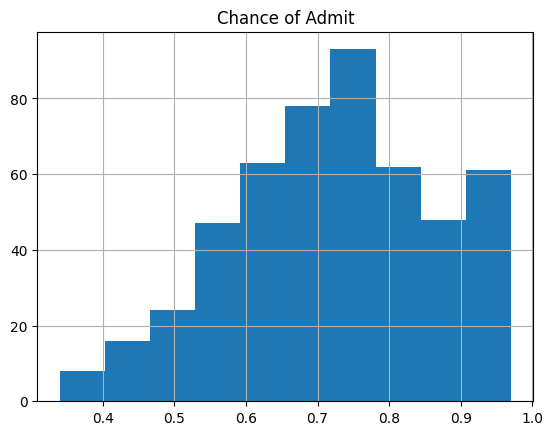

In [13]:
# Histograma que mostra a distribuição do valor da coluna target (alvo)
df.hist(column='Chance of Admit')

In [14]:
# Calculando a média da variável target
print('Média: ',df['Chance of Admit'].mean())

Média:  0.72174


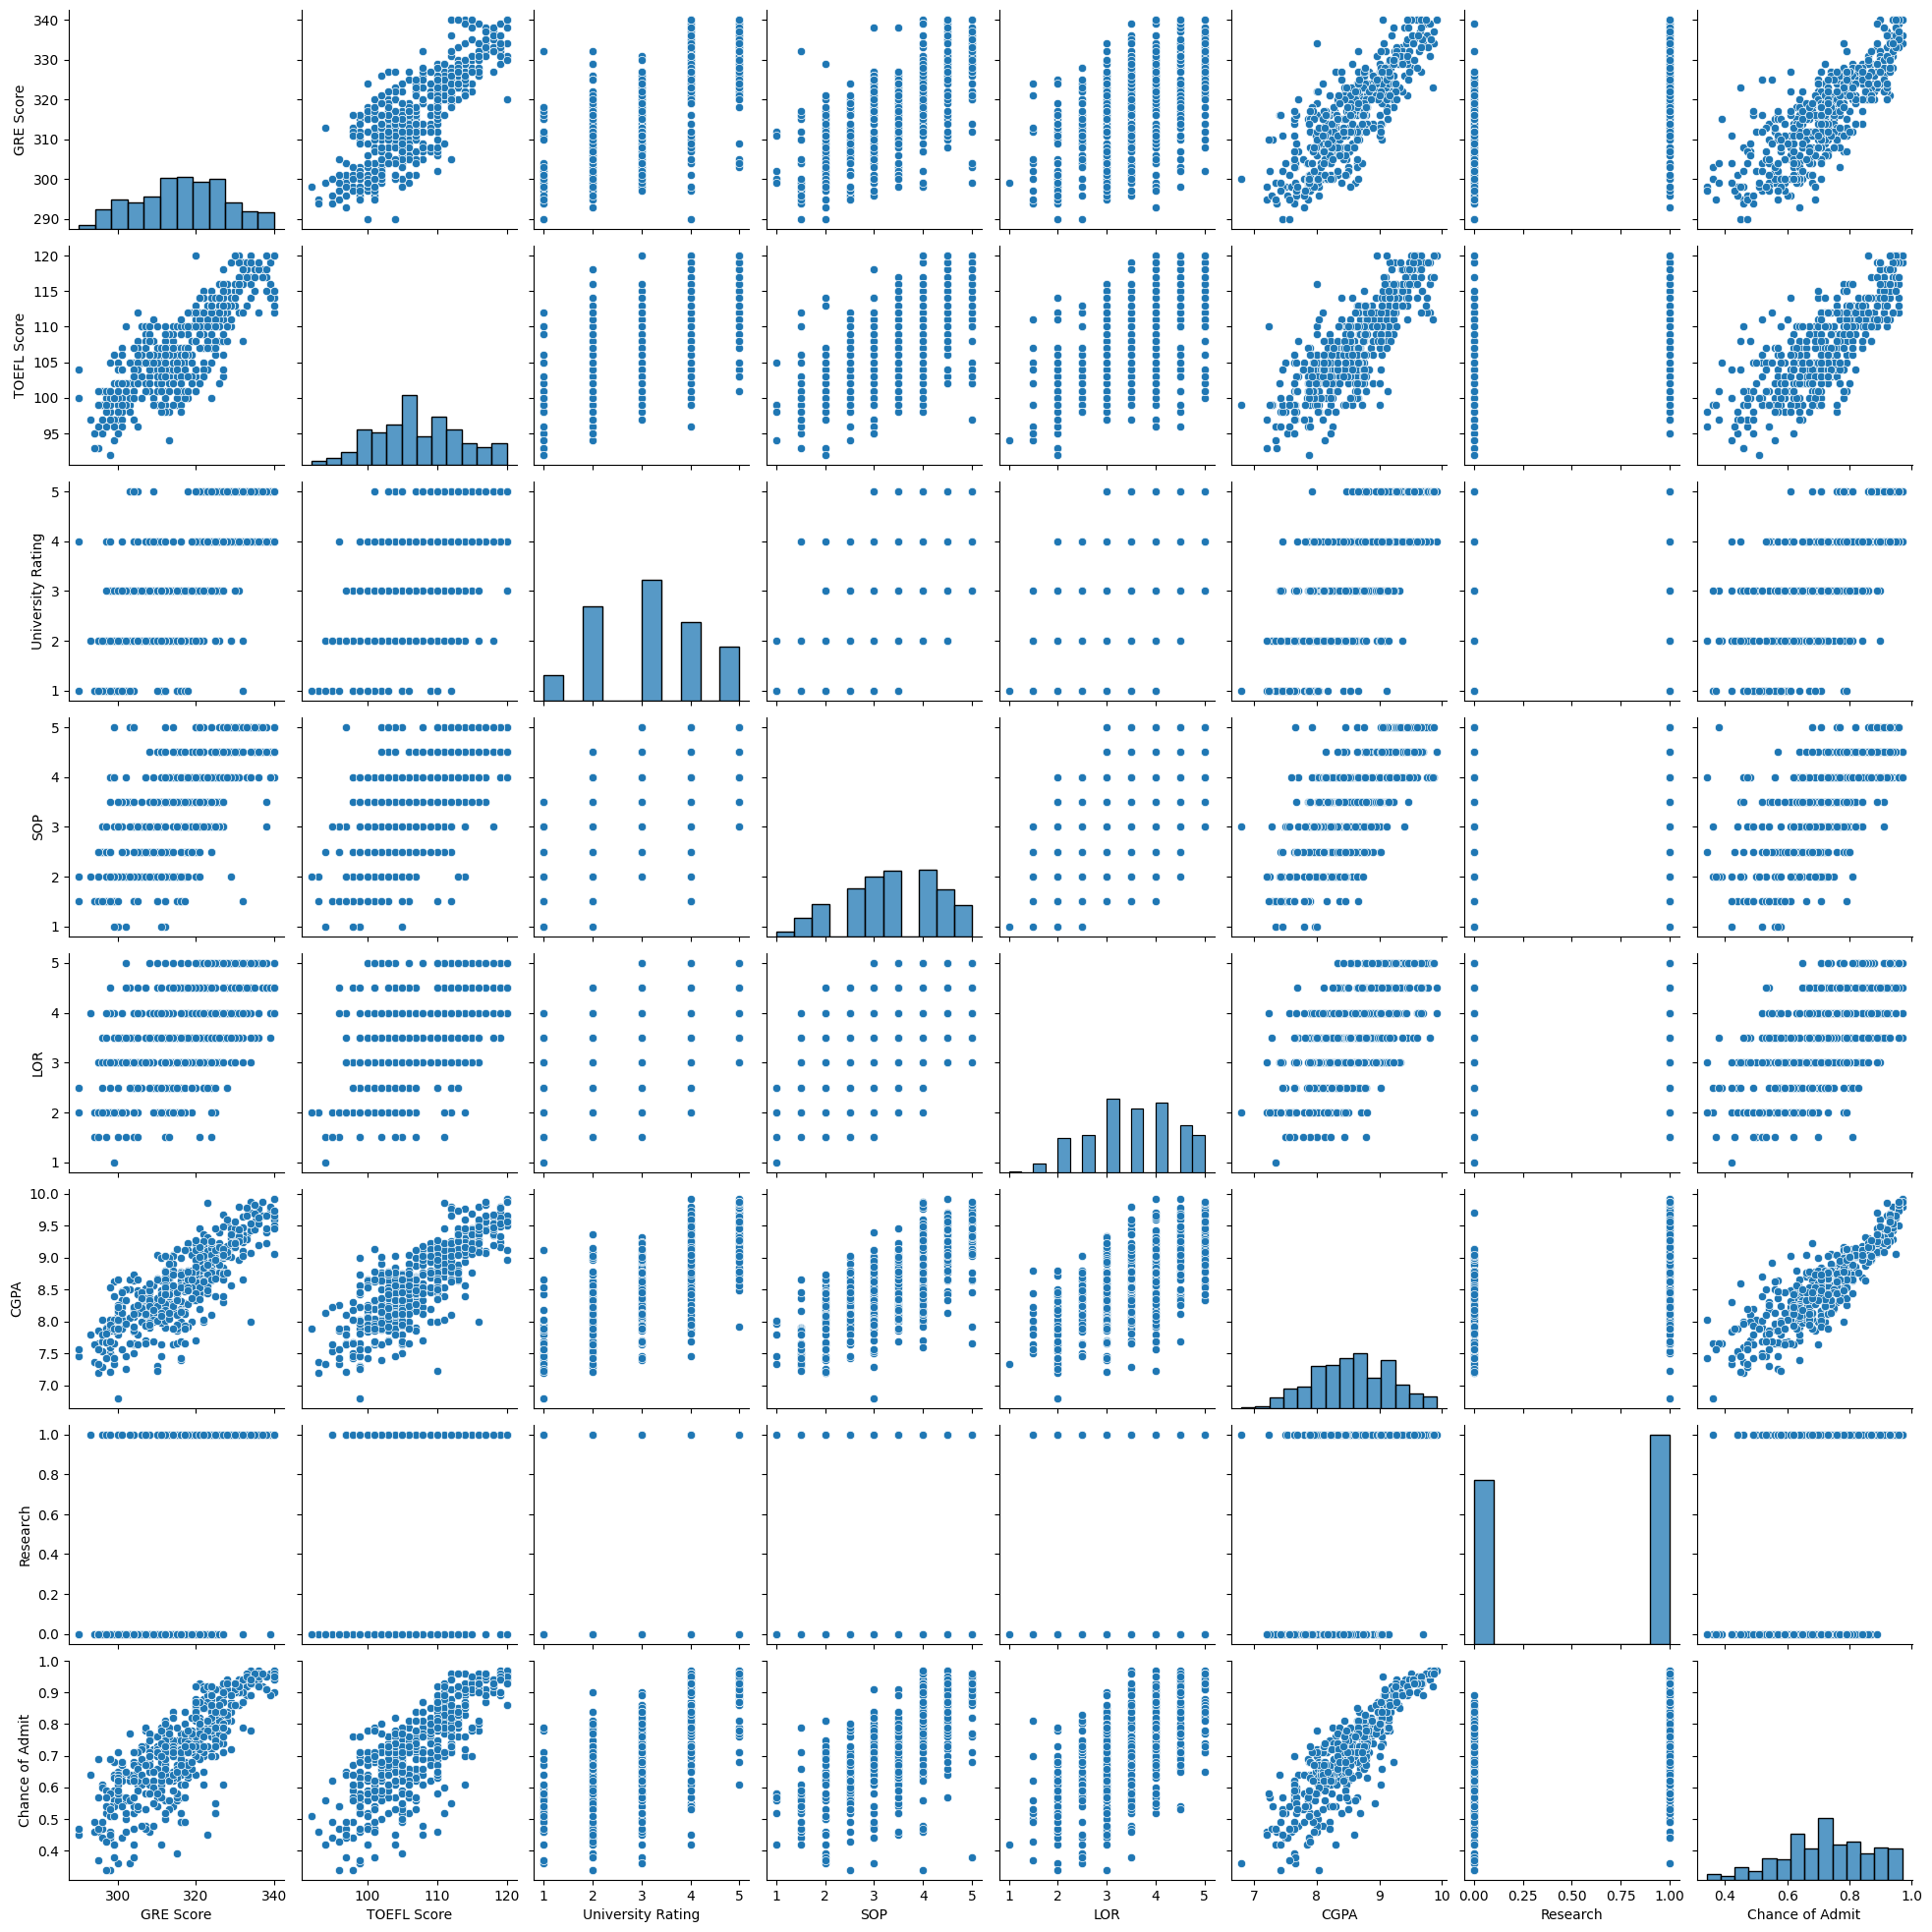

In [15]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
sns.pairplot(df)

Podemos ver através do gráfico acima que as colunas abaixo possuem uma correção linear:
- GRE Score
- TOEFL Score
- CGPA

<Axes: >

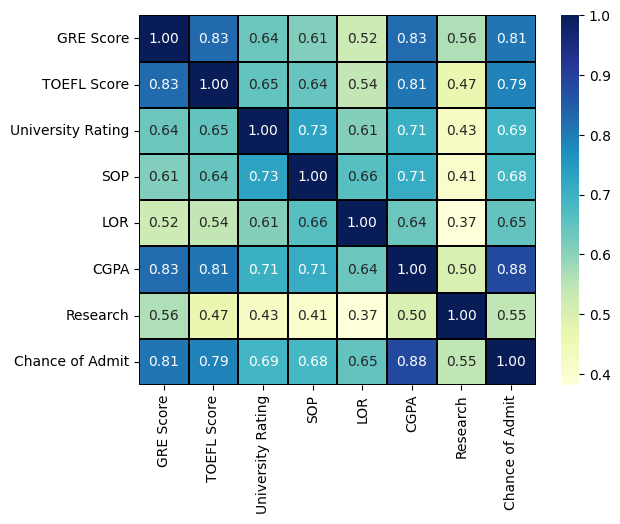

In [16]:
# Plotando a correlação de outra forma, com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

O mapa acima confirma o que já percebemos, ou seja, que as 3 variáveis abaixo são as que possuem maior correlação com o resultado:
- CGPA (0.88)
- GRE Score (0.81)
- TOEFL Score (0.79)


In [17]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit'].values

In [18]:
# Imprimindo os primeiros valores de X
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [19]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45]


In [20]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(500, 7)
(500,)


## Regressão Linear com 1 variável (CGPA)

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

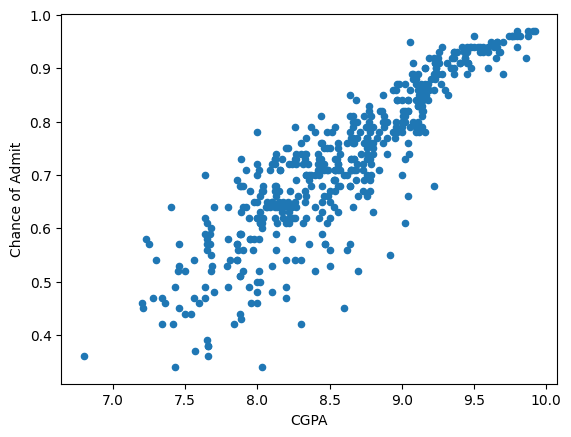

In [21]:
# Vamos agora imprimir um scatter plot entre CGPA e o resultado (target)
df.plot(kind = 'scatter', x = 'CGPA', y = 'Chance of Admit')

In [22]:
  # Separando apenas a variável de interesse e fazendo o reshape
X_1 = X['CGPA'].values.reshape(len(X),1)
print(X_1.shape)

(500, 1)


In [23]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_1 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (400, 1)
y_train: (400,)
X_test: (100, 1)
y_test: (100,)


In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Agora efetivamente treinamos o modelo com fit()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (100,)


In [26]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 0.004390763141599453
Mean Absolute Error (MAE): 0.04693610614269898
Score R2: 0.7284012605253238
Score: 0.7850947698711452


<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

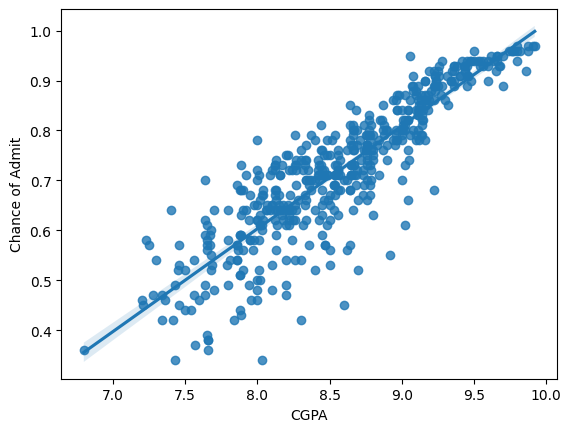

In [27]:
# Representação da linha de regressão
sns.regplot(x='CGPA',y='Chance of Admit',data=df[['CGPA','Chance of Admit']])

## Regressão Linear com mais variáveis

In [28]:
# Vamos utilizar 3 variáveis
VARS = ['CGPA', 'GRE Score', 'TOEFL Score']
X_2 = X[VARS].values.reshape((len(X), len(VARS)))
print(X_2.shape)

(500, 3)


In [29]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_2 , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (400, 3)
y_train: (400,)
X_test: (100, 3)
y_test: (100,)


In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
# prevendo valores para X_test
y_pred = lin_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (100,)


In [32]:
# Medidas de desempenho
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
print("Score R2:",r2_score(y_pred,y_test))
print('Score:',lin_reg.score(X_test, y_test))

Mean Squared Error (MSE): 0.003716438123165236
Mean Absolute Error (MAE): 0.04327348762741586
Score R2: 0.777038829272952
Score: 0.8180995047190058


Veja que o uso de mais variáveis melhorou o modelo, pois o valor de R2 aumentou e os erros médios diminuíram.

Os valores anteriores eram:


```
Mean Squared Error (MSE): 0.004390763141599453
Mean Absolute Error (MAE): 0.04693610614269898
Score R2: 0.7284012605253238
Score: 0.7850947698711452
```


# Exercício 4.1 - Treinando outros modelos de Regressão Linear

Você viu acima que o uso de mais variáveis na regressão linear melhorou o modelo.

Adicione novas células de código abaixo e implemente outros modelos de Regressão Linear que utilize mais variáveis, podendo utilizar até todas as  variáveis do dataset, para prever a variável TARGET.

Para cada modelo, crie também uma célula de código para imprimir os valores de MSE, MAE e R2.

Crie uma célula de Texto para colocar as conclusões do grupo, informando com quais variáveis o modelo teve a melhor performance e os valores comparativos.
Mostre os resultados em uma tabela comparativa, que mostre os resultados de Score e R2 para cada modelo criado.



# Entrega dos exercícios

Antes de entregar seu notebook, verifique se o mesmo está funcionando adequadamente com o menu "Ambiente de Execução > Reiniciar e executar tudo".

Salve o arquivo .ipynb com a opção "Arquivo > Fazer download do .ipynb" e poste pelo Ulife

FIM

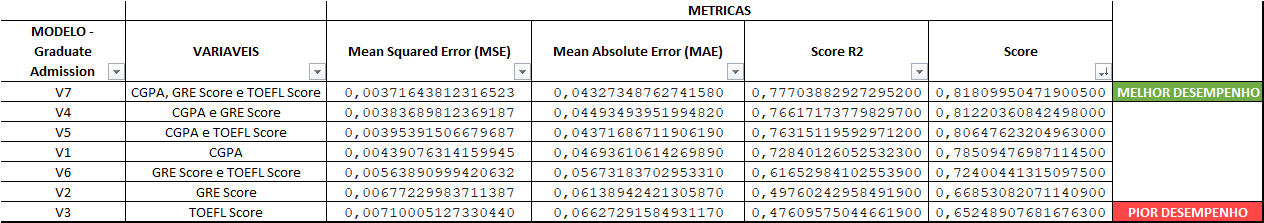

In [33]:
# Modelo Graduate Admission

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def trainModel(model, vars):
  X_2 = X[vars].values.reshape((len(X), len(vars)))
  X_train, X_test, y_train, y_test = train_test_split (X_2 , y, test_size=0.2, random_state=50)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  print(f"---MODELO V{model}---" )
  print("Mean Squared Error (MSE):",mean_squared_error(y_pred,y_test))
  print("Mean Absolute Error (MAE):",mean_absolute_error(y_pred,y_test))
  print("Score R2:",r2_score(y_pred,y_test))
  print('Score:',lin_reg.score(X_test, y_test))
  print("\n")


models = [['CGPA'],['GRE Score'],['TOEFL Score'],['CGPA', 'GRE Score'],['CGPA','TOEFL Score'],['GRE Score','TOEFL Score'],['CGPA','GRE Score','TOEFL Score']]


for i in range(len(models)):
    modelVersion = i+1
    modelVars = models[i]
    trainModel(modelVersion,modelVars)


---MODELO V1---
Mean Squared Error (MSE): 0.004390763141599453
Mean Absolute Error (MAE): 0.04693610614269898
Score R2: 0.7284012605253238
Score: 0.7850947698711452


---MODELO V2---
Mean Squared Error (MSE): 0.006772299837113875
Mean Absolute Error (MAE): 0.06138942421305876
Score R2: 0.49760242958491985
Score: 0.6685308207114097


---MODELO V3---
Mean Squared Error (MSE): 0.007100051273304407
Mean Absolute Error (MAE): 0.06627291584931176
Score R2: 0.4760957504466191
Score: 0.6524890768167638


---MODELO V4---
Mean Squared Error (MSE): 0.0038368981236918793
Mean Absolute Error (MAE): 0.044934939519948244
Score R2: 0.7661717377982973
Score: 0.8122036084249803


---MODELO V5---
Mean Squared Error (MSE): 0.003953915066796872
Mean Absolute Error (MAE): 0.04371686711906192
Score R2: 0.763151195929712
Score: 0.8064762320496304


---MODELO V6---
Mean Squared Error (MSE): 0.005638909994206321
Mean Absolute Error (MAE): 0.0567318370295331
Score R2: 0.6165298410255394
Score: 0.7240044131509753